In [138]:
# Dependencies
import requests
import json
from pprint import pprint
from citipy import citipy
import random
import openweathermapy.core as owm
from config import api_key
import pandas as pd
import matplotlib.pyplot as plt

# Generate Cities List

In [139]:
# Create coordinates list to populate with random coordinates
coordinates = []

# Generate random coordinates and append to coordinates list
for x in range(30):
    coordinates.append((random.randint(-90, 91), random.randint(-180, 181)))

print(coordinates)

[(7, 93), (75, 57), (35, 12), (-86, 6), (-72, -123), (87, 144), (-42, -95), (47, 100), (-16, -105), (-72, -7), (-50, -162), (12, 8), (40, 16), (2, 51), (20, 89), (58, 71), (16, -150), (5, -42), (65, 163), (-74, 35), (-11, -140), (-48, 118), (-13, -169), (-14, 59), (-35, 57), (57, -136), (-35, 179), (-20, -98), (-50, -75), (-4, -153)]


In [140]:
cities = []
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    city_obj = citipy.nearest_city(lat, lon)
    city = city_obj.city_name
    
    # Want unique cities
    if city not in cities:
        cities.append(city)

print(cities)

['sabang', 'belushya guba', 'jabinyanah', 'hermanus', 'rikitea', 'chokurdakh', 'ancud', 'moron', 'puerto ayora', 'cape town', 'avarua', 'malumfashi', 'lauria', 'hobyo', 'harindanga', 'ust-ishim', 'hilo', 'carutapera', 'kamenskoye', 'port elizabeth', 'atuona', 'albany', 'samusu', 'cap malheureux', 'saint-joseph', 'sitka', 'ruatoria', 'punta arenas', 'faanui']


# Perform API Calls

In [141]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [144]:
# Set up lists to hold reponse information
cloudiness = []
country = []
date = []
humidity = []
lat = []
lon = []
max_temp = []
wind_speed = []

# Loop through the list of cities and perform a request for data on each
for i, city in enumerate(cities):
    print(f"Processing Record {i + 1} | {city}")
    
    # Replace spaces in cities names of more than one word
    city_name = city.replace(" ", "+")
    
    # Print each query
    full_query_url = query_url + city_name
    print(full_query_url)
    
    # Retrieve data as json
    response = requests.get(full_query_url).json()
    
    # Append data to lists
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
    except KeyError:
        # Remove city from cities list if city not found
        cities.remove(city)
            
print(cities)
print(len(cities))

Processing Record 1 | sabang
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=sabang
Processing Record 2 | jabinyanah
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=jabinyanah
Processing Record 3 | hermanus
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=hermanus
Processing Record 4 | rikitea
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=rikitea
Processing Record 5 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=chokurdakh
Processing Record 6 | ancud
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=ancud
Processing Record 7 | moron
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=moron
Processin

In [146]:
cities_data_df = pd.DataFrame({'City': cities, 
                               'Cloudiness': cloudiness, 
                               'Country': country, 
                               'Date': date, 
                               'Humidity': humidity, 
                               'Lat': lat, 
                               'Lon': lon, 
                               'Max Temp': max_temp, 
                               'Wind Speed': wind_speed})

cities_data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,sabang,68,PH,1520234778,92,13.72,123.58,82.04,4.52
1,jabinyanah,20,TN,1520233200,66,35.03,10.91,55.40,3.36
2,hermanus,20,ZA,1520234062,90,-34.42,19.24,62.06,4.41
3,rikitea,44,PF,1520234048,100,-23.12,-134.97,79.65,10.11
4,chokurdakh,8,RU,1520234110,34,70.62,147.90,-22.68,8.21
5,ancud,0,CL,1520234787,83,-41.87,-73.83,43.61,2.73
6,moron,88,VE,1520234787,96,10.49,-68.20,66.78,2.62
7,puerto ayora,0,EC,1520234788,100,-0.74,-90.35,76.68,4.85
8,cape town,0,ZA,1520229600,73,-33.93,18.42,69.80,12.75
9,avarua,20,CK,1520233200,78,-21.21,-159.78,80.60,6.93


# Latitude vs. Temperature Plot

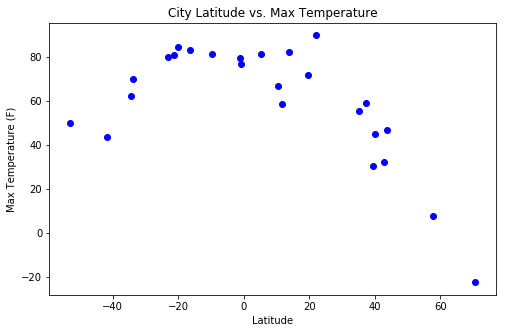

In [147]:
# Set figure size
plt.figure(figsize=(8, 5))

# Create scatter plot
plt.scatter(cities_data_df['Lat'], cities_data_df['Max Temp'], marker='o', color='b')

# Label title and axes
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Latitude vs. Temperature Plot
plt.show()

# Latitude vs. Humidity Plot

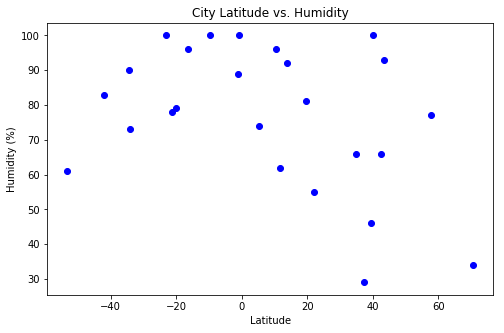

In [148]:
# Set figure size
plt.figure(figsize=(8, 5))

# Create scatter plot
plt.scatter(cities_data_df['Lat'], cities_data_df['Humidity'], marker='o', color='b')

# Label title and axes
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Latitude vs. Humidity Plot
plt.show()

# Latitude vs. Cloudiness Plot

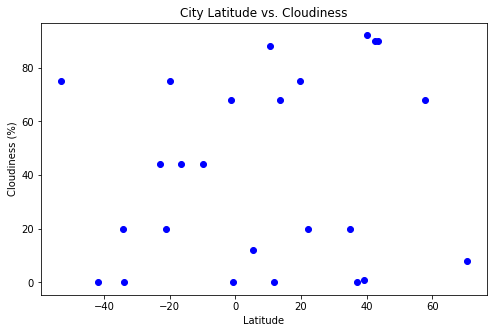

In [149]:
# Set figure size
plt.figure(figsize=(8, 5))

# Create scatter plot
plt.scatter(cities_data_df['Lat'], cities_data_df['Cloudiness'], marker='o', color='b')

# Label title and axes
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Latitude vs. Cloudiness Plot
plt.show()

# Latitude vs. Wind Speed Plot

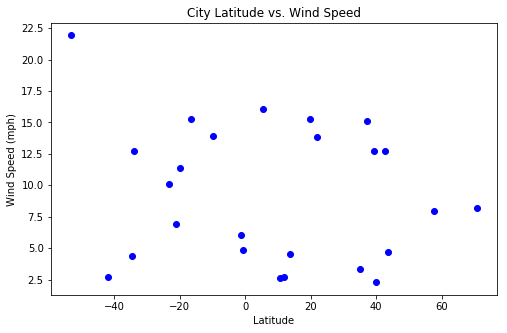

In [150]:
# Set figure size
plt.figure(figsize=(8, 5))

# Create scatter plot
plt.scatter(cities_data_df['Lat'], cities_data_df['Wind Speed'], marker='o', color='b')

# Label title and axes
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Latitude vs. Wind Speed Plot
plt.show()